# Capstone 2: narrative analytics and experimentation

In [23]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#set the seed to assure you get the same answers, otherwise, you could remove the following line
random.seed(100)

file = 'ab_data.csv'
df = pd.read_csv(file)

In [24]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


# PROBABILITY:

In [25]:
# allows us to see the rows of the dataset 
df.shape[0]

294478

Retrieving the unique number of ID's 

In [26]:
df.user_id.nunique()

290584

The proportion of users converted.

In [27]:
"%.4f" % (df.converted.sum() / df.converted.count())

'0.1197'

Samples on two demonsions grouped by control & treatment and new & old page



In [28]:
df.groupby(['group','landing_page']).count()['converted']

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: converted, dtype: int64

Checking for missing values

In [29]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Create a new dataset where the treatment group is the new_page and the control group is the old_page

In [48]:
df2 = df.query("group == 'control' & landing_page == 'old_page'")

In [49]:
df3 = df.query("group == 'treatment' & landing_page == 'new_page'")

In [50]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [51]:
df3.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [53]:
df2.nunique()

user_id         145274
timestamp       145274
group                1
landing_page         1
converted            2
dtype: int64

In [54]:
df3.nunique()

user_id         145310
timestamp       145311
group                1
landing_page         1
converted            2
dtype: int64

Check all rows were removed

In [56]:
df3[((df3['group'] == 'treatment') & (df3['landing_page'] == 'new_page')) == False].shape[0]

0

Are there any unique id's in the new dataframe ?

In [59]:
df3.user_id.nunique()

145310

In [60]:
df3[df3.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [61]:
df3.drop_duplicates(subset='user_id', keep='first', inplace=True)

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
final_df=pd.concat([df2,df3])

In [76]:
final_df.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [80]:
final_df.groupby(['group','landing_page']).count()['converted']

group      landing_page
control    old_page        145274
treatment  new_page        145310
Name: converted, dtype: int64

Counting the unique id for the concatenated A/B dataset

In [84]:
final_df.user_id.nunique()

290584

Finding out the probability for user whether they are on the new_page or old_page:

In [99]:
"%.4f"% (final_df.converted.sum() / final_df.converted.count())

'0.1196'

Probability for control group if they converted: 

In [100]:
obs_old = final_df.query('group == "control"')['converted'].sum() / final_df.query('group == "control"')['converted'].count()
'%.4f' %obs_old

'0.1204'

Probabiltiy for treatment group if they converted:

In [102]:
obs_new = final_df.query('group == "treatment"')['converted'].sum() / final_df.query('group == "treatment"')['converted'].count()
'%.4f' %obs_new

'0.1188'


The conversion rate for the new treatment was lower than the conversion rate for the whole group. The new treatment rate was also lower than the control group. The results show that there is not sufficient evidence that shows that the new treatment group results in higher conversion rates. 

# A/B Test:

H0: Pold =  Pnew           
H1: Pold <> Pnew



Null hypothesis: Pnew and Pold both have success rates equal to each other     

Alternative hypothesis: Pnew has a conversion rate greater thane Pold

convert rate for Pnew under the null which will be the same as P_old (Pold_null) for the null hypothesis:

In [115]:
Pnew_null=(final_df.query('group == "treatment"')['converted']== 1).mean()
'%.4f'%Pnew_null

'0.1188'

In [ ]:
#Pold_null = Pnew_null

In [131]:
null_rate=df['converted'].sum()/df.shape[0]

In [122]:
final_df.groupby('landing_page').count()['user_id']

landing_page
new_page    145310
old_page    145274
Name: user_id, dtype: int64

This will be the number of transactions for the new page (n_new) and the old page (n_old)

In [125]:
n_new, n_old = 145310, 145274

This will be a simulation of n_new transactions with a convert rate of Pnew_null (which is under the null hypothesis)

    The results will be stored as 1's and 0's in Pnew_converted 

In [138]:
Pnew_converted=np.random.choice(2,n_new,p=[1-null_rate,null_rate])
Pnew_converted

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [139]:
Pold_converted=np.random.choice(2,n_old,p=[1-null_rate,null_rate])
Pold_converted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
#means the differences in converted success rate between the two pages 
Pnew_converted.sum()/n_new - Pold_converted.sum() / n_old

-0.00038083995832498274

p_differences = simulated 10,000 values 

In [143]:
p_differences = []

for test1 in range(1000):
    bootstrap_new = np.random.choice(2,n_new,p=[1-null_rate,null_rate])
    bootstrap_old = np.random.choice(2,n_old,p=[1-null_rate,null_rate])
    p_new = bootstrap_new.sum() /n_new
    p_old = bootstrap_old.sum() / n_old
    p_differences.append(p_new - p_old)

In [144]:
p_differences

[0.0019110971682851918,
 0.0001215649727646928,
 -0.0005872627210788822,
 -6.406731689548306e-05,
 0.0010854555730547971,
 4.5897147730150634e-05,
 -0.0007590631182082669,
 0.0009341284498452646,
 -0.0026586825651313956,
 -0.0014267498518152621,
 0.0005757970320630079,
 -0.0006009854698078854,
 -0.000359988091842775,
 0.0003213310057823826,
 0.0004174465241582048,
 0.0011545382939730647,
 -0.0006215388962071411,
 0.0032326864933816812,
 -3.6371129767773236e-05,
 0.0015396177121051458,
 0.0018353611283745547,
 0.0020077072445127825,
 0.0022898745740368293,
 1.1387336651236257e-05,
 0.0012505736598694694,
 -0.0003464546393949497,
 -0.001399174746092649,
 -0.0013992412555968448,
 0.0017119621228714604,
 0.0026683910578873538,
 -0.001640071507115523,
 0.0007480340043994754,
 -0.0004565299531942568,
 0.001629197582149855,
 0.0020417685427813193,
 0.00042452448075436244,
 -0.0002292945475119157,
 0.0010440144673633661,
 0.00019746813912178973,
 0.001264192380912424,
 -0.0020323994190339784,


In [145]:
p_differences = np.array(p_differences)

In [146]:
p_differences

array([ 1.91109717e-03,  1.21564973e-04, -5.87262721e-04, -6.40673169e-05,
        1.08545557e-03,  4.58971477e-05, -7.59063118e-04,  9.34128450e-04,
       -2.65868257e-03, -1.42674985e-03,  5.75797032e-04, -6.00985470e-04,
       -3.59988092e-04,  3.21331006e-04,  4.17446524e-04,  1.15453829e-03,
       -6.21538896e-04,  3.23268649e-03, -3.63711298e-05,  1.53961771e-03,
        1.83536113e-03,  2.00770724e-03,  2.28987457e-03,  1.13873367e-05,
        1.25057366e-03, -3.46454639e-04, -1.39917475e-03, -1.39924126e-03,
        1.71196212e-03,  2.66839106e-03, -1.64007151e-03,  7.48034004e-04,
       -4.56529953e-04,  1.62919758e-03,  2.04176854e-03,  4.24524481e-04,
       -2.29294548e-04,  1.04401447e-03,  1.97468139e-04,  1.26419238e-03,
       -2.03239942e-03,  2.38776226e-04, -3.18625433e-04, -4.15305430e-04,
        1.14695072e-04, -2.53493225e-03,  3.90410316e-04,  9.33920394e-04,
        3.48771387e-04, -1.87971112e-04,  1.35349939e-03, -4.69961083e-04,
       -1.66743003e-03, -

ploting a histogram of the p_differences

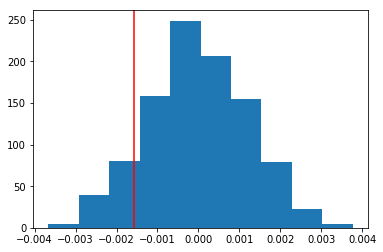

In [148]:
plt.hist(p_differences)
observation_differences=obs_new-obs_old
plt.axvline(x = observation_differences,color='red')
plt.show()

proportion of the p_differences are greater than the actual difference 

In [149]:
(p_differences>observation_differences).mean()

0.895

In [150]:
import statsmodels.api as sm

convert_old = df.query('landing_page == "old_page"')['converted'].sum()
convert_new = df.query('landing_page == "new_page"')['converted'].sum()


In [151]:
z_score, p_value = sm.stats.proportions_ztest\
([convert_new,convert_old],[n_new, n_old],alternative='larger')
(z_score, p_value)

(-1.394390551291367, 0.9184001500898661)

p-value = 0.91 

p-value = 0.05


we would fail to reject the null hypotesis. The old pages have a higher than or equal to conversion rates than the new pages